# IO

In [1]:
from PineBioML.preprocessing import IO

In [2]:
# Path
input_folder = "./input/"
output_folder = "./output/"
export_title = "example_basic "

In [3]:
##### Read data method 1: read single file
##### index_col is the column of index of samples (or sample name).
##### If your data do not have such column, please set index_col=None
data = IO.read_file(input_folder+ "HAPTdata.csv", index_col=None)

##### pick the target label column
y = data["target"]

##### drop the target from dataframe, using the remaining to predict y (the target)
x = data.drop("target", axis = 1)

##### Read data method 2: read multiple files
x, y = IO.read_multiple_groups(
    file_path_list=[
        input_folder+ "example_group1.csv", # all samples from this file will have y = 0, because it is in the 1st place of the file path list.
        input_folder+ "example_group2.tsv", # all samples from this file will have y = 1, because it is in the 2nd place of the file path list.
    ],
    index_col=0
    )

In [4]:
x.head(5)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column552,Column553,Column554,Column555,Column556,Column557,Column558,Column559,Column560,Column561
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849


In [5]:
y.value_counts()

target
STANDING              556
LAYING                545
SITTING               508
WALKING               496
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
STAND_TO_LIE           49
SIT_TO_LIE             32
LIE_TO_STAND           27
LIE_TO_SIT             25
STAND_TO_SIT           23
SIT_TO_STAND           10
Name: count, dtype: int64

# Preprocessing

In [6]:
from PineBioML.preprocessing import Normalizer

x = Normalizer(method="StandardScaler").fit_transform(x)

In [7]:
# Impute 0
from PineBioML.preprocessing import impute

# The imputer will drop the features with missing value more than 60%.
# Remaining will be filled by 0.
simple = impute.simple_imputer(threshold = 0.6, strategy = "constant")
x = simple.fit_transform(x)

# Data overview

In [8]:
import PineBioML.report.utils as report_utils

start PCA


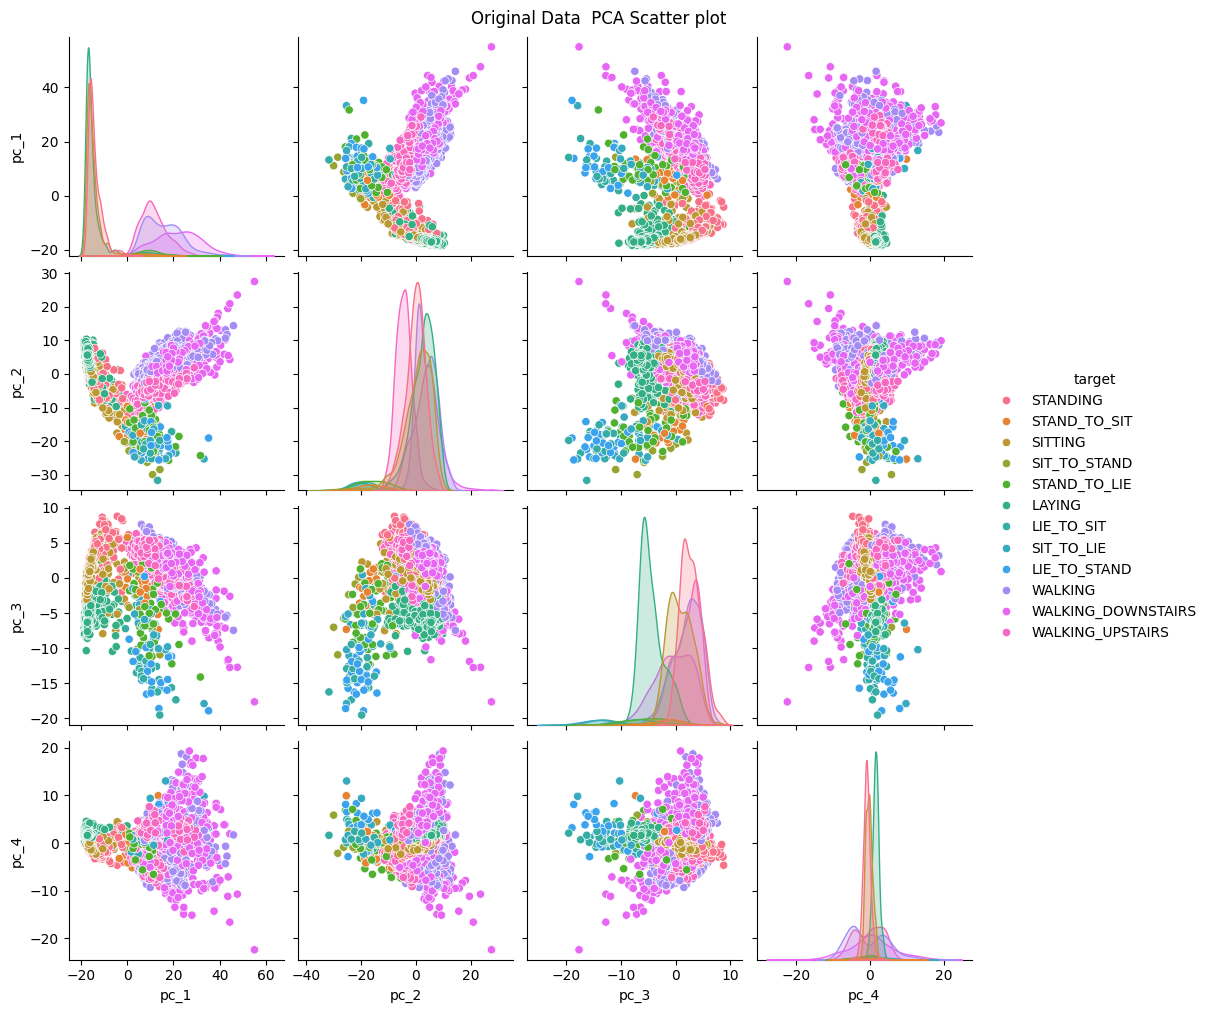

start PLS


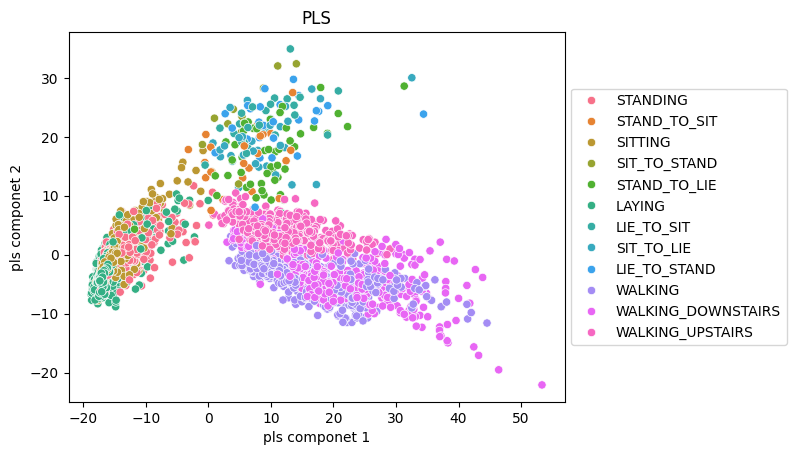

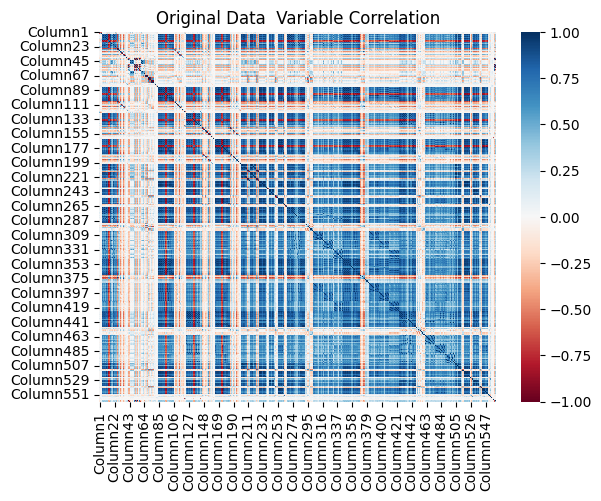

start UMAP


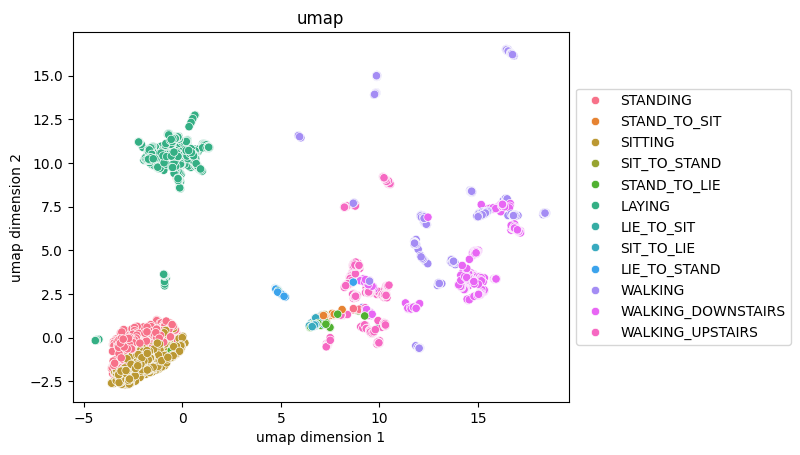

In [9]:
report_utils.data_overview(x, y, is_classification=True, prefix="Original Data ", save_fig=True, save_path="./output/images/", show_fig=True)

# Feature selection

In [10]:
from PineBioML.selection.ensemble import selector

In [11]:
# Use several way to select top-k important features, which includes decision tree, random forest, lasso, multi lasso, svm, adaboost, xgboost
ensemble_selector = selector(k = 40, z_importance_threshold=2)
important_feature, importance = ensemble_selector.Select(x, y) # if k = -1, it returns all the feature scores

Using  c45  to select.


100%|██████████| 561/561 [00:04<00:00, 131.10it/s]


c45  is done.

Using  RF_gini  to select.


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 1024 out of 1024 | elapsed:   17.7s finished
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


RF_gini  is done.

Using  AdaBoost  to select.
I don't have a progress bar but I am running
AdaBoost  is done.

Using  Lasso_Bisection  to select.


C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.329e+00, tolerance: 2.415e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+01, tolerance: 2.415e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-pac

Lasso_Bisection  is done.

Using  multi_Lasso  to select.


C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.329e+00, tolerance: 2.415e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+01, tolerance: 2.415e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-pac

multi_Lasso  is done.

Using  SVM  to select.


C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM  is done.

Using  XGboost  to select.
XGboost  is done.

Using  Lightgbm  to select.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 140107
[LightGBM] [Info] Number of data points in the train set: 3162, number of used features: 561
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start

In [12]:
# The features that was selected by ML algoritms.
important_feature

,DT_score_c45,RandomForest_gini,AdaBoost128,LassoLinear,multi_Lasso,SVM,XGboost,Lightgbm
0,Column512,Column53,Column54,Column50,Column47,Column446,Column337,Column50
1,Column69,Column1,Column382,Column382,Column60,Column183,Column126,Column1
2,Column68,Column23,Column1,Column538,Column1,Column143,Column469,Column103
3,Column26,Column41,Column2,Column1,Column382,Column559,Column538,Column2
4,Column144,Column57,Column45,Column61,Column61,Column146,Column382,Column382
5,Column294,Column54,Column24,Column64,Column48,Column2,Column543,Column42
6,Column70,Column559,Column16,Column60,Column44,Column557,Column513,Column295
7,Column106,Column50,Column513,Column2,Column45,Column50,Column560,Column130
8,Column374,Column51,Column539,Column261,Column57,Column25,Column465,Column452
9,Column145,Column382,Column244,Column44,Column2,Column13,Column82,Column41


In [13]:
# The feature importance given by diffirent methods.
# Please Notice that the score between diffirent methods is not comparable.
importance

,DT_score_c45,RandomForest_gini,AdaBoost128,LassoLinear,multi_Lasso,SVM,XGboost,Lightgbm
Column512,0.705821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column69,0.702054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column68,0.701797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column26,0.701755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Column144,0.701752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
Column120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,217.0
Column140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.0
Column188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0
Column200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201.0


In [14]:
# merging importance from diffirent feature by z-score.
merge_importance = ((importance-importance.mean())/importance.std()).mean(axis = 1).sort_values(ascending=False)
merge_importance

Column512    4.758031
Column446    3.915130
Column337    3.806738
Column183    3.595882
Column126    2.620384
               ...   
Column18    -0.858224
Column39    -0.911667
Column331   -1.133886
Column526   -1.165981
Column186   -1.191292
Length: 176, dtype: float64

### Choosing the top-5 feature to build models

In [15]:
x = x[merge_importance.index[:20]]

start PCA


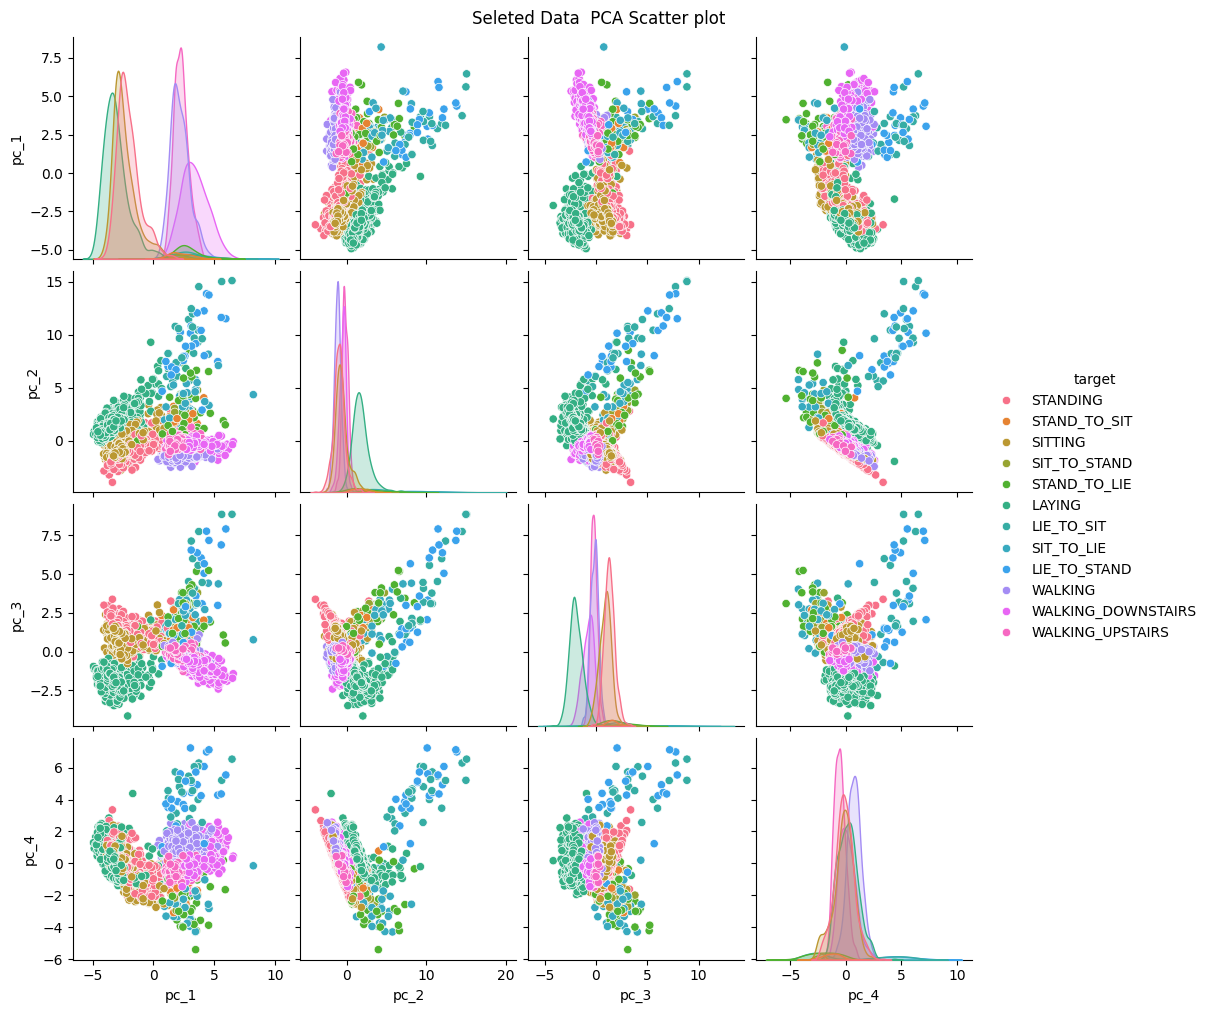

start PLS


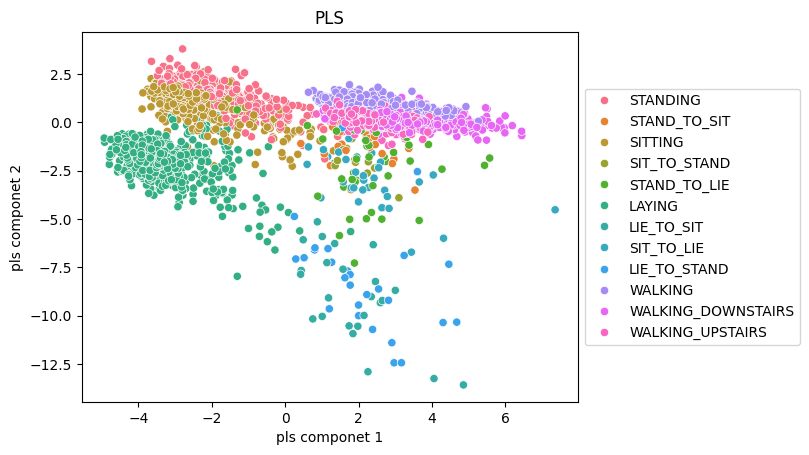

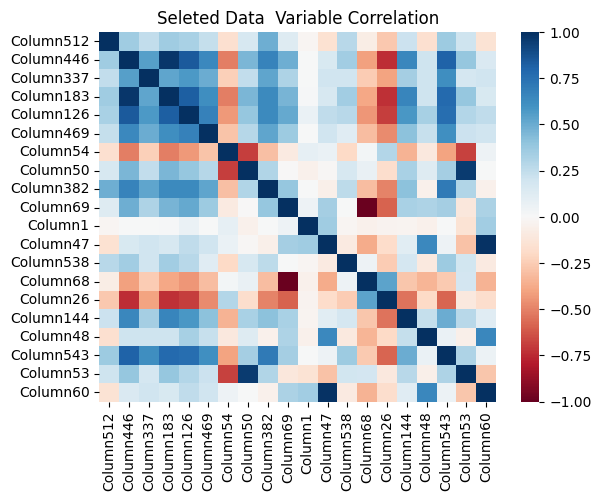

start UMAP


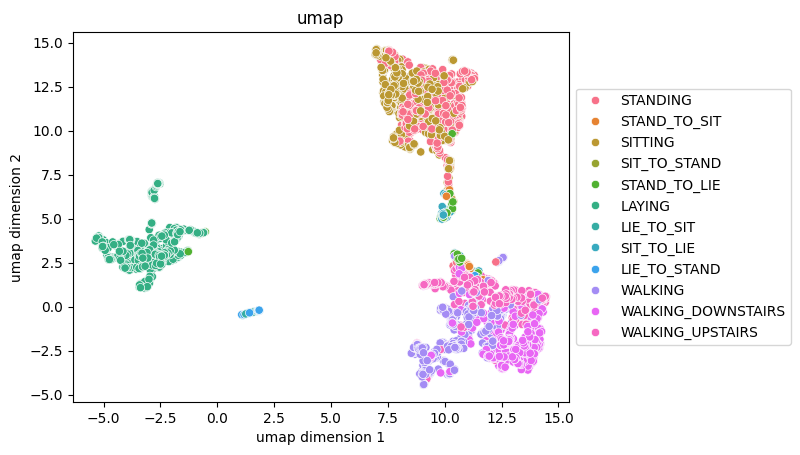

In [16]:
# Overviewing the top-5 features.
report_utils.data_overview(x, y, is_classification=True, prefix="Seleted Data ", save_fig=True, save_path="./output/images/", show_fig=True)

# Modeling

### Train test split

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, random_state=142, shuffle=True, stratify=y)

### Tuning a model

In [19]:
import PineBioML.model.supervised.Classification as tuner

optuna seed 14444  |  validation seed 10840  |  model seed 6858
    start tuning. it will take a while.
    default is better.

 
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       180
        LIE_TO_SIT       0.75      0.38      0.50         8
      LIE_TO_STAND       0.50      0.56      0.53         9
           SITTING       0.96      0.96      0.96       168
        SIT_TO_LIE       0.64      0.70      0.67        10
      SIT_TO_STAND       0.75      1.00      0.86         3
          STANDING       0.96      0.96      0.96       184
      STAND_TO_LIE       0.52      0.69      0.59        16
      STAND_TO_SIT       0.67      0.25      0.36         8
           WALKING       0.92      0.91      0.92       164
WALKING_DOWNSTAIRS       0.91      0.83      0.87       139
  WALKING_UPSTAIRS       0.85      0.95      0.90       155

          accuracy                           0.92      1044
         macro avg       0.7

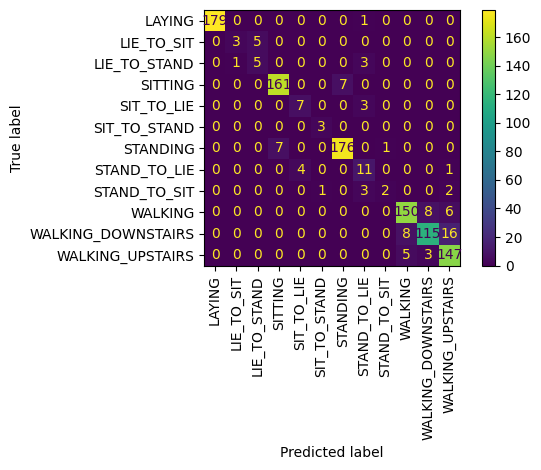

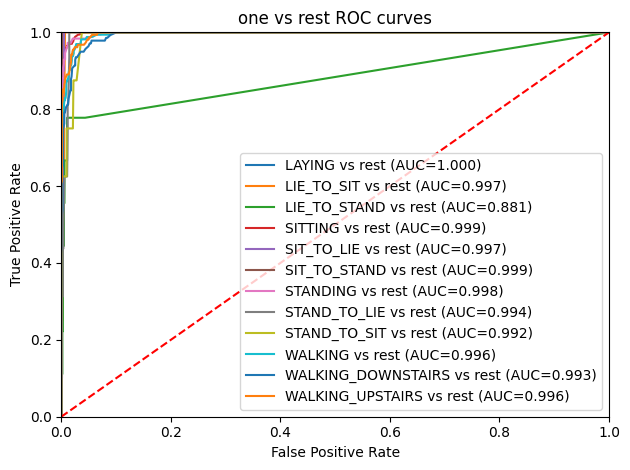

In [22]:
rf = tuner.RandomForest_tuner(target="mse", kernel_seed=11, valid_seed = 222, optuna_seed = 3333).fit(x_train, y_train)
report_utils.classification_summary(y_valid, rf.predict_proba(x_valid))

optuna seed 13627  |  validation seed 4000  |  model seed 3280
    start tuning. it will take a while.
    optuna is better, best trial:  1

 
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      0.99       180
        LIE_TO_SIT       0.50      0.38      0.43         8
      LIE_TO_STAND       0.44      0.44      0.44         9
           SITTING       0.94      0.86      0.89       168
        SIT_TO_LIE       0.75      0.30      0.43        10
      SIT_TO_STAND       0.67      0.67      0.67         3
          STANDING       0.88      0.95      0.91       184
      STAND_TO_LIE       0.52      0.81      0.63        16
      STAND_TO_SIT       0.67      0.25      0.36         8
           WALKING       0.91      0.95      0.93       164
WALKING_DOWNSTAIRS       0.90      0.88      0.89       139
  WALKING_UPSTAIRS       0.92      0.93      0.93       155

          accuracy                           0.91      1044
         macro 

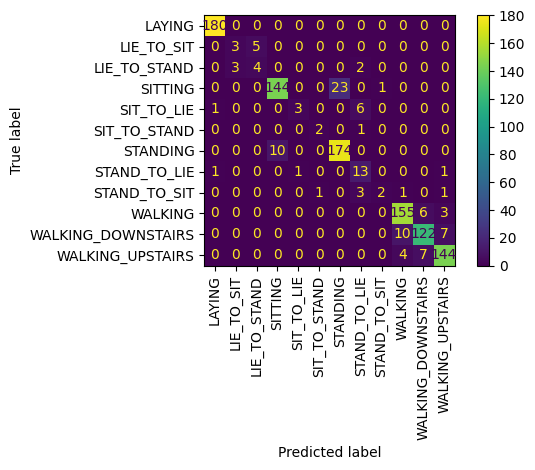

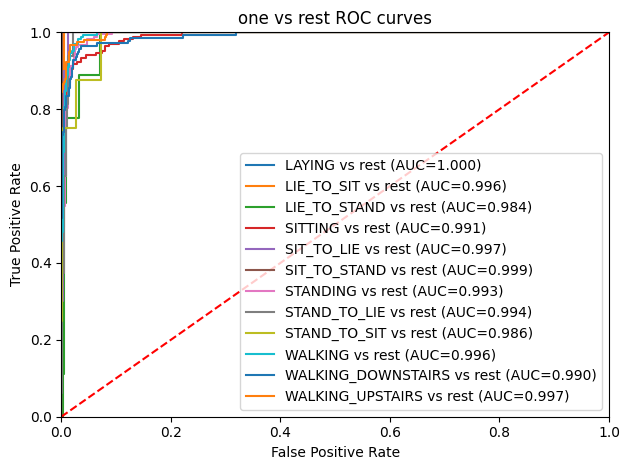

In [23]:
svm = tuner.SVM_tuner(target="qwk", kernel_seed=11, valid_seed = 222, optuna_seed = 3333).fit(x_train, y_train)
report_utils.classification_summary(y_valid, svm.predict_proba(x_valid))

optuna seed 7620  |  validation seed 2292  |  model seed 12717
    start tuning. it will take a while.
    optuna is better, best trial:  63

 
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       180
        LIE_TO_SIT       0.50      0.62      0.56         8
      LIE_TO_STAND       0.40      0.22      0.29         9
           SITTING       0.97      0.94      0.95       168
        SIT_TO_LIE       0.67      0.80      0.73        10
      SIT_TO_STAND       1.00      1.00      1.00         3
          STANDING       0.95      0.96      0.95       184
      STAND_TO_LIE       0.55      0.69      0.61        16
      STAND_TO_SIT       0.83      0.62      0.71         8
           WALKING       0.97      0.95      0.96       164
WALKING_DOWNSTAIRS       0.93      0.93      0.93       139
  WALKING_UPSTAIRS       0.92      0.95      0.94       155

          accuracy                           0.94      1044
         macro

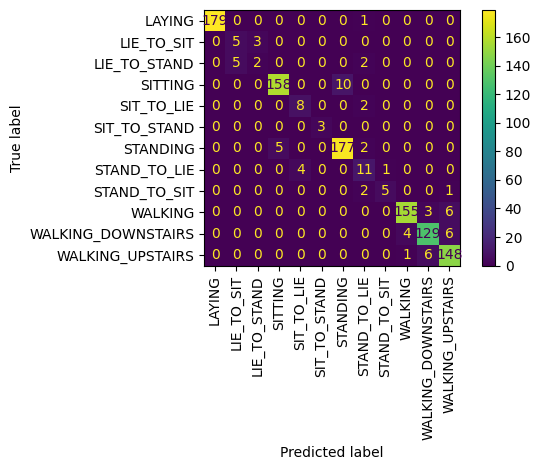

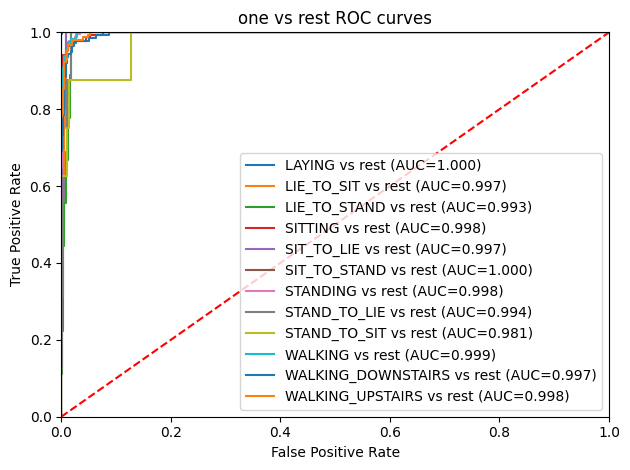

In [24]:
xgb = tuner.XGBoost_tuner(target="mcc", kernel_seed=11, valid_seed = 222, optuna_seed = 3333).fit(x_train, y_train)
report_utils.classification_summary(y_valid, xgb.predict_proba(x_valid))

optuna seed 13699  |  validation seed 14281  |  model seed 216
    start tuning. it will take a while.
    optuna is better, best trial:  94

 
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       180
        LIE_TO_SIT       0.67      0.75      0.71         8
      LIE_TO_STAND       0.67      0.44      0.53         9
           SITTING       0.98      0.95      0.96       168
        SIT_TO_LIE       0.64      0.70      0.67        10
      SIT_TO_STAND       1.00      1.00      1.00         3
          STANDING       0.95      0.97      0.96       184
      STAND_TO_LIE       0.55      0.75      0.63        16
      STAND_TO_SIT       1.00      0.62      0.77         8
           WALKING       0.97      0.96      0.96       164
WALKING_DOWNSTAIRS       0.94      0.94      0.94       139
  WALKING_UPSTAIRS       0.94      0.95      0.95       155

          accuracy                           0.95      1044
         macro

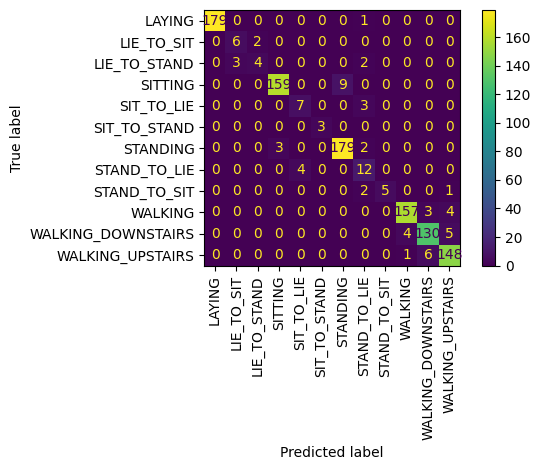

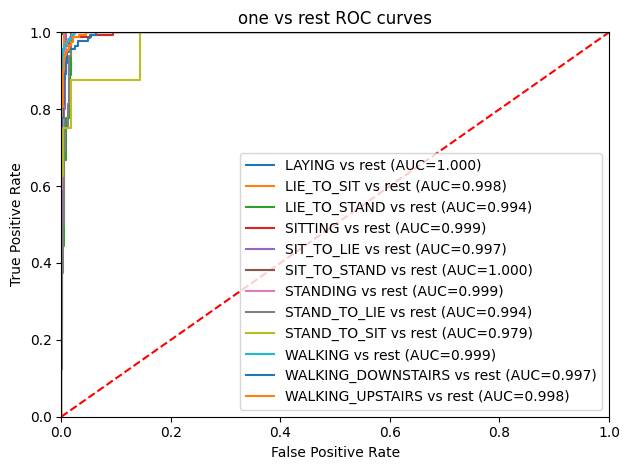

In [25]:
lgbm = tuner.LighGBM_tuner(target="balanced_accuracy", kernel_seed=11, valid_seed = 222, optuna_seed = 3333).fit(x_train, y_train)
report_utils.classification_summary(y_valid, lgbm.predict_proba(x_valid))

optuna seed 3333  |  validation seed 222  |  model seed 11
    start tuning. it will take a while.


C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWa

    optuna is better, best trial:  11


C:\Users\aimhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



 
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       180
        LIE_TO_SIT       0.40      0.25      0.31         8
      LIE_TO_STAND       0.40      0.44      0.42         9
           SITTING       0.92      0.77      0.84       168
        SIT_TO_LIE       0.44      0.70      0.54        10
      SIT_TO_STAND       0.50      1.00      0.67         3
          STANDING       0.84      0.91      0.87       184
      STAND_TO_LIE       0.38      0.50      0.43        16
      STAND_TO_SIT       0.33      0.25      0.29         8
           WALKING       0.90      0.84      0.87       164
WALKING_DOWNSTAIRS       0.87      0.81      0.84       139
  WALKING_UPSTAIRS       0.82      0.93      0.87       155

          accuracy                           0.86      1044
         macro avg       0.65      0.70      0.66      1044
      weighted avg       0.87      0.86      0.86      1044



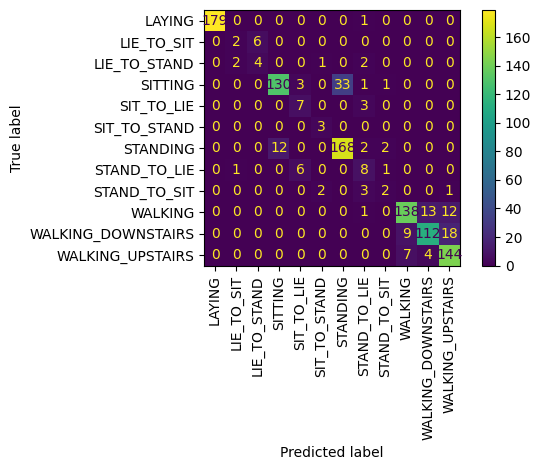

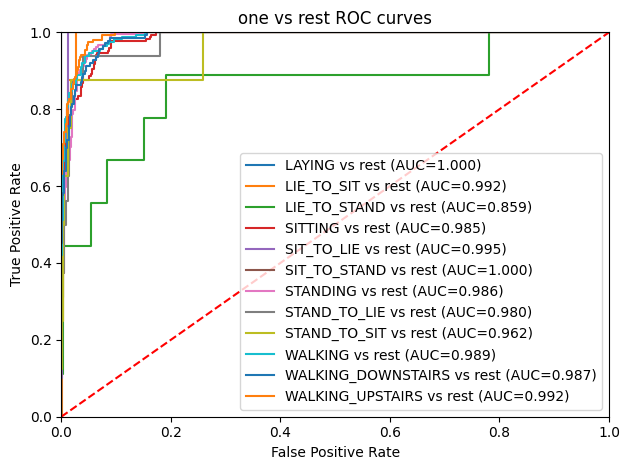

In [27]:
elasticnet = tuner.ElasticLogit_tuner(target = "log_loss", kernel_seed=11, valid_seed = 222, optuna_seed = 3333).fit(x_train, y_train)
#elasticnet.summary()
report_utils.classification_summary(y_valid, elasticnet.predict_proba(x_valid)) 

### Mljar

from supervised.automl import AutoML

mljar = AutoML(mode = "Perform", results_path = output_folder+"MLjar")
mljar.fit(x_train, y_train)

report_utils.classification_summary(y_valid, mljar.predict_proba(x_valid)[:, 1])

# Output

In [28]:
# Save the result ro output_path
important_feature.to_csv(output_folder + export_title + " important feature.csv")
importance.to_csv(output_folder+export_title+ " importance.csv")

In [29]:
from PineBioML.IO import save_model
# save model
save_model(rf, save_path=output_folder+"models/", save_name=export_title+"RandomForest", overide=False)
save_model(svm, save_path=output_folder+"models/", save_name=export_title+"SVM", overide=False)

example_basic RandomForest  has already exist in  ./output/models/
please choose another model save_name or set overide to True which will replace the existing one
example_basic SVM  has already exist in  ./output/models/
please choose another model save_name or set overide to True which will replace the existing one


# Reload model


 
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       180
        LIE_TO_SIT       0.40      0.25      0.31         8
      LIE_TO_STAND       0.40      0.44      0.42         9
           SITTING       0.92      0.77      0.84       168
        SIT_TO_LIE       0.44      0.70      0.54        10
      SIT_TO_STAND       0.50      1.00      0.67         3
          STANDING       0.84      0.91      0.87       184
      STAND_TO_LIE       0.38      0.50      0.43        16
      STAND_TO_SIT       0.33      0.25      0.29         8
           WALKING       0.90      0.84      0.87       164
WALKING_DOWNSTAIRS       0.87      0.81      0.84       139
  WALKING_UPSTAIRS       0.82      0.93      0.87       155

          accuracy                           0.86      1044
         macro avg       0.65      0.70      0.66      1044
      weighted avg       0.87      0.86      0.86      1044



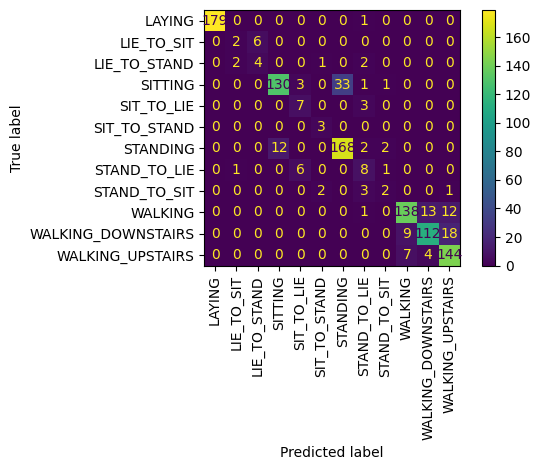

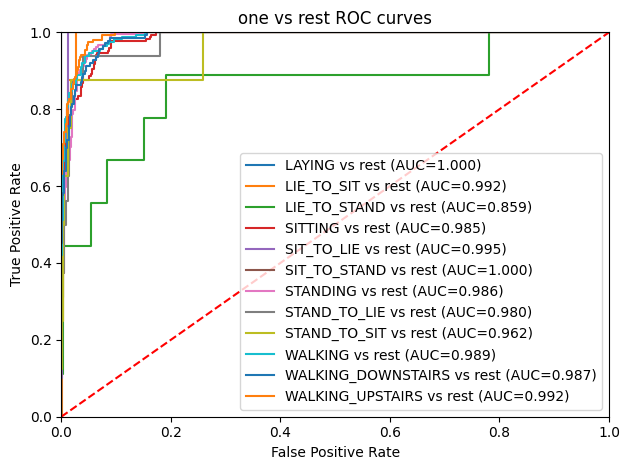

In [30]:
from PineBioML.IO import load_model
# load model
presaved_model = load_model(output_folder+"models/", export_title+"SVM")

report_utils.classification_summary(y_valid, elasticnet.predict_proba(x_valid)) 